<a href="https://colab.research.google.com/github/SahilBamb/ClientServerVsPeertoPeerSim/blob/main/CS356_Simulate_Distribution_Time_for_Client_server_and_P2P_Architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use your favorite code or excel (if you don't know programming), write a small program to simulate the minimum distribution time for both Client-server and P2P architectures. The submission will include 3 parts

# 1. Part 1: Visual graph plotting both C-S and P2P architecture minimum file distribution time over a given number of computers.

Parameters:

X-axis: Number of Client 1,2,4,8,16,32,64,128,256

Y-axis: Minimum distribution time

File size F = 2000 Bytes

Upload rate Server us = 10 #Bytes/sec

Upload rate Client uc = 1 #Bytes/sec

Download Rate Client dc = 2 #Bytes/sec 

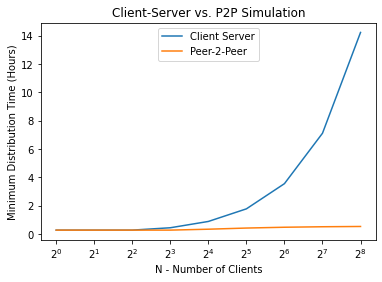

Client Server Architecture
+------------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
|            Number of Clients             |         1          |         2          |         4          |         8          |         16         |         32         |         64         |        128        |        256         |
+------------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
| Minimum File Distribution Time (Seconds) |       1000.0       |       1000.0       |       1000.0       |       1600.0       |       3200.0       |       6400.0       |      12800.0       |      25600.0      |      51200.0       |
|  Minimum File Distribution Time (Hours)

In [ ]:
import random
from matplotlib import pyplot as plt
from prettytable import PrettyTable 

#Number of Clients
Clients = [1,2,4,8,16,32,64,128,256]

#File Size F
F = 2000 #Bytes 

#Upload rate for Server us
serverUploadRate = us = 10 #Bytes/1c

#Upload rate for each Client uc
clientUploadRate = uc = 1 #Bytes/sec

#Download Rate for each Client dc 
downloadRate = d = 2 #Bytes/sec 

#Peer-2-Peer Calculations
def CalcP2P(F,us,uc,d,n):
  up = F/us
  dwn = F/d
  pr = (n*F) / (us + (uc*n))
  return max(max(up,dwn),pr)

#Client-2-Server Calculations
def CalcCS(F,us,d,n):
  up = (n*F)/us
  dwn = F/d
  return max(up,dwn)

def drawCSTable(Clients,ClientServerTime,ClientServerTimeSeconds):
  print('Client Server Architecture')
  myTable = PrettyTable(['Number of Clients']+Clients)
  myTable.add_row(['Minimum File Distribution Time (Seconds)']+ClientServerTimeSeconds)
  myTable.add_row(['Minimum File Distribution Time (Hours)']+ClientServerTime)
  print(myTable)

def drawP2PTable(Clients,P2PTime,P2PTimeSeconds):
  print('Peer-2-Peer File Architecture')
  myTable = PrettyTable(['Number of Clients']+Clients)
  myTable.add_row(['Minimum File Distribution Time (Seconds)']+P2PTimeSeconds)
  myTable.add_row(['Minimum File Distribution Time (Hours)']+P2PTime)
  print(myTable)

ClientServerTimeSeconds = [CalcCS(F,us,d,n) for n in Clients]
ClientServerTime = [n/3600 for n in ClientServerTimeSeconds]


P2PTimeSeconds = [CalcP2P(F,us,uc,d,n) for n in Clients]
P2PTime = [n/3600 for n in P2PTimeSeconds]



plt.plot(Clients,ClientServerTime,label='Client Server')
plt.plot(Clients,P2PTime,label='Peer-2-Peer')
plt.xlabel("N - Number of Clients")
plt.ylabel("Minimum Distribution Time (Hours)")
plt.title('Client-Server vs. P2P Simulation')
plt.xscale('log', basex=2)
plt.xticks(ticks=Clients)
#plt.yticks(ticks=[_ for _ in range(1,14,1)]) 
plt.legend(loc='upper center')
plt.show()

drawCSTable(Clients,ClientServerTime,ClientServerTimeSeconds)
drawP2PTable(Clients,P2PTime,P2PTimeSeconds)



#2. Part 2: Explain what your approach and brief me what you did in your code

#Calculations Code Description 
To start, I loaded all of the parameters like number of clients, file size, upload rate of the server, upload rate of each client and download rate of each client as variables. Number of clients was loaded into a list. Then I defined the functions for calculating the minimum time for Peer-2-Peer and Client Server architectures. 

For Client Server architectures this is the greater of two values. The first of these is the upload time of the server, so file size divided by server upload rate, times the number of clients. The second is the download speed of the slowest client or file size divided by download rate. So the function basically does these calculations, given the parameters, and returns the minimum file distribution time. 

For Peer-2-Peer architectures this is the greater of three values. The first of these is the upload time of the server times, so file size divided by server upload rate. The second is the download speed of the slowest client or file size divided by download rate. And the third is the file size times the number of clients, divided by the total upload speed. The total upload speed is the upload speed of all clients and the server. The function does all these calculations, given the parameter and returns the minimum file distribution time. 

Finally, list comprehensions are used along with these functions to create new lists that calculate the minimum file distribution time for client server architectures and for peer-2-peer architectures. One of these lists is made in seconds and the other is made in hours by dividing each value by 36000.

#Visualization Code Description 

Using the pyplot from the matplotlib library, these values were plotted onto the same grid. They both used the same client numbers so clients were placed on the x-axis and the minimum distribution time was placed on they y-axis. 

Additionally, tables were added using the prettytable library to provide exact values for the minimum distribution time in seconds and hours. 

#3. Part 3: The actual code in your favorite language (This will showcase to me your coding and your code style)

This was included above.